# Project 1:  Clustering Algorithms

## Assignment Overview

### Objective:
To provide students with hands-on experience in implementing clustering techniques on real-world datasets.

### About the data:
The Economist Democracy Index is an annual index compiled by the UK-based magazine, The Economist,   
through its Economist Intelligence Unit (EIU). This index rates the state of democracy across countries worldwide.    
  
It is based on five categories:

- **Electoral Process and Pluralism:**   
This measures the fairness of elections, the freedom to form political parties, and the participation of various groups in the political process.  

- **Functioning of Government:** This evaluates how effectively governments operate, the quality of governance, the level of corruption, and whether political decisions are made in a transparent manner. 

- **Political Participation:** This assesses the level of public involvement in politics, including voter turnout, membership in political parties, and engagement with political issues. 
 
- **Political Culture:** This looks at the societal norms and attitudes towards politics, including the extent to which different viewpoints are tolerated and the relationship between government and religion. 

- **Civil Liberties:** This gauges the extent of individual freedoms, including freedom of speech, freedom of the press, and the right to protest. 


**Countries are classified into four types of regimes based on their scores:**
 
- Full democracies 
- Flawed democracies 
- Hybrid regimes 
- Authoritarian regimes 

The Democracy Index is widely referenced in political and academic circles as a comprehensive measure of the state of democracy globally.   
It provides a snapshot of the health of democracy in each country and also allows for comparisons across countries and over time. 

[Additional information on Democracy Index ](https://en.wikipedia.org/wiki/The_Economist_Democracy_Index)

## Step 1: Access the dataset for use in your Notebook.   

You can find a csv version of this dataset already installed in your lab as `democracy_index.csv`, or download it for local use through 
[this link](https://github.com/JustGlowing/minisom/blob/master/examples/democracy_index.csv). 

## **Step 2:**  Clustering Implementation (Tasks) 

Please follow and complete each step below to complete the assignment.

### **Task 1:** Load the democracy index data set 

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [158]:
#Load the democracy index dataset
dem_index = pd.read_csv('democracy_index.csv')
dem_index.head()

,Unnamed: 0,rank,country,democracy_index,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties,category
0,0,1,Norway,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy
1,1,2,Iceland,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy
2,2,3,Sweden,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy
3,3,4,New Zealand,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy
4,4,5,Denmark,9.22,10.00,9.29,8.33,9.38,9.12,Full democracy


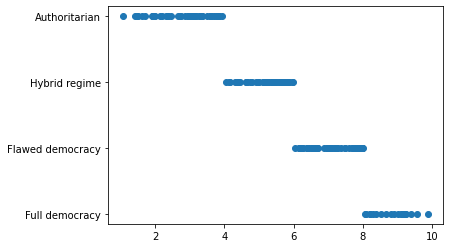

In [4]:
#plotting to see the different categories
plt.scatter(dem_index.democracy_index,dem_index.category)

### **Task 2:**  Use the five categories to cluster countries into different regimes 

The value of the democracy index is the mean of the five features of the dataset.
Create a temporary dataframe with the influencing features to perform the required
tasks.

In [159]:
features = ['electoral_processand_pluralism', 'functioning_of_government', 
           'political_participation', 'political_culture', 'civil_liberties']

# Extract the features from the dataset into X
X = dem_index[features]
X

,electoral_processand_pluralism,functioning_of_government,political_participation,political_culture,civil_liberties
0,10.00,9.64,10.00,10.00,9.71
1,10.00,9.29,8.89,10.00,9.71
2,9.58,9.64,8.33,10.00,9.41
3,10.00,9.29,8.89,8.13,10.00
4,10.00,9.29,8.33,9.38,9.12
...,...,...,...,...,...
162,0.00,0.00,1.67,3.75,2.65
163,2.25,0.00,1.11,1.88,2.35
164,0.50,0.71,2.22,3.13,0.88
165,0.00,0.00,2.78,4.38,0.00


### **Task 3:**  Preprocess the data (if necessary), such as normalizing or scaling the features 

__a: Find out why we need to maintain a uniform scale across the variables for K-means and Hierarchical clustering__ 

The primary purpose of scaling is to ensure that the features selected for applying the algorithms that rely on distance metrics, such as k-means clustering, are on the same scale as these algorithms are sensitive to the scale of the input features. They need to contribute equally to the distance(Euclidean) calculations. Without scaling, features with large values will disproportionately impact the distance calculations and hence the clustering.

__b: Do we need to use scaling techniques for this dataset?__

All variables in our dataset are already on the same scale (like in the case where all indices are from 0–10). We _do not_ need to scale the dataset.


In [162]:
#Applying the Standard Scaler 

scaler = StandardScaler()
X = scaler.fit_transform(X)



### **Task 4.:**  Implement K-means clustering to categorize the data into clusters

__a. Use elbow method to determine number of clusters__


The elbow method is a graphical method for finding the optimal K value in a
k-means clustering algorithm. We do this by plotting the inertia(Sum of squared
Errors) against the different values of K and visually identifying the elbow that shows
the best cluster number.

In [163]:
# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

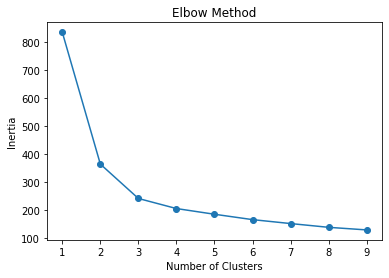

In [164]:
# Plot the Elbow curve
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

__b. Verify if the solution offered by the elbow method and the actual soultion (number of regimes) match__

_Looking at the elbow curve, there is a huge difference of inertia(SSE) between 3 clusters and 4 clusters and not a lot of difference between 4 and 5 clusters. So I believe the solution provided by the elbow method matches with the number of regimes._

__c. Do we need to use elbow method to detrmine number of clusters for this dataset?__

_I believe the numbers of regimes is already given and we can just use the elbow method to just confirm. We didn't need it to determine the number of clusters._

We then run the KMeans clustering algorithm on our standardized data with the
number of clusters we identified using the elbow method.
To visualize the KMeans for the dataframe with five features impacting the
democracy index value, we need to use PCA to reduce the dimensions to 2D.

In [165]:
#Apply the KMeans Clustering algorithm
kmeans = KMeans(n_clusters=4, random_state=50)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original data
dem_index['clusters'] = clusters

Principal Component Analysis (PCA) applied to the selected features, identifies the combination of attributes that account for the most variance in the data.


In [166]:
#PCA to reduce dimensions to 2D for visualization 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [171]:
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

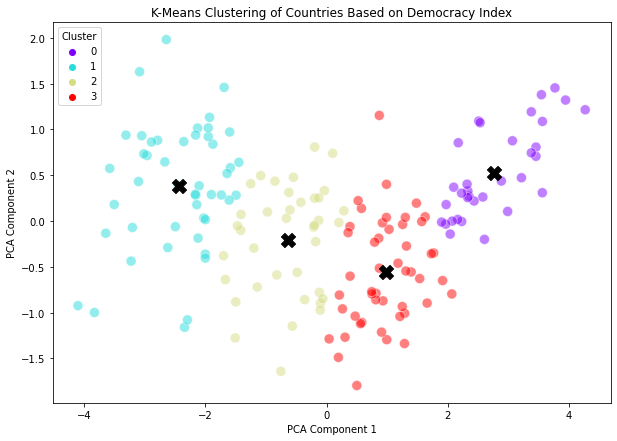

In [181]:
# Create a scatter plot for the K-Means clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:,1], hue=dem_index.clusters, palette='rainbow', s=100, alpha=0.5)
plt.scatter(centroids_pca[:, 0],centroids_pca[:, 1], s=200, c='black', marker='X')


# Add labels and title
plt.title('K-Means Clustering of Countries Based on Democracy Index')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

### **Task 5:**  Implement Hierarchical clustering using an appropriate linkage method 

Choosing __ward__ linkage method, as ‘ward’ minimizes the variance of the clusters being merged.

 

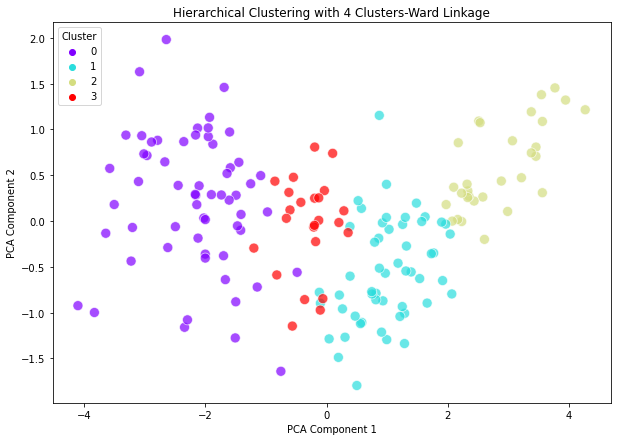

In [188]:
from sklearn.cluster import AgglomerativeClustering
# Using Agglomerative Clustering for hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_clusters = agg_clustering.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:,1], hue=agg_clusters,palette='rainbow', s=100, alpha=0.7)
plt.title("Hierarchical Clustering with 4 Clusters-Ward Linkage")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


**a:** Try different linkage criteria 

Using 'complete' linkage method uses the maximum distances between all observations of the two sets.


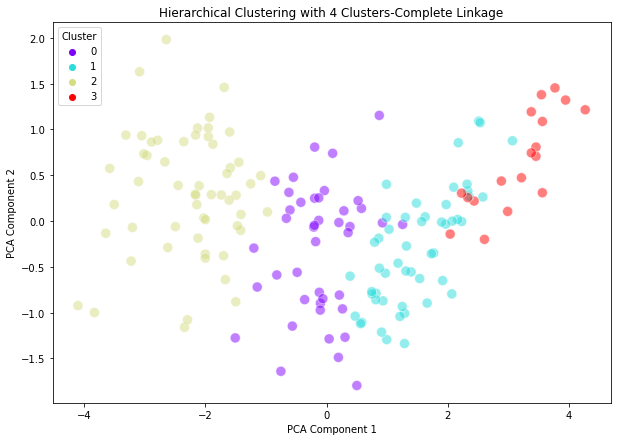

In [189]:
from sklearn.cluster import AgglomerativeClustering

# Using Agglomerative Clustering for hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage="complete")
clusters = agg_clustering.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:,1], hue=clusters, palette="rainbow",s=100,alpha=0.5)

plt.title("Hierarchical Clustering with 4 Clusters-Complete Linkage")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

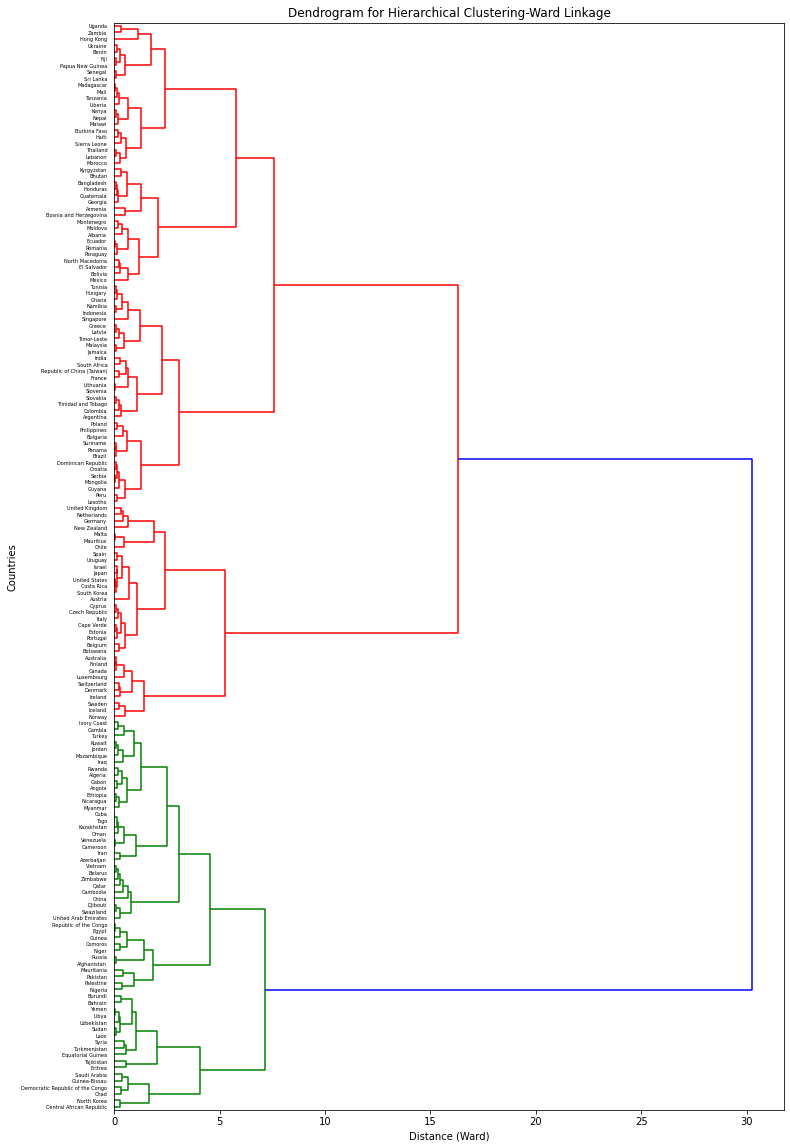

In [190]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generating a dendrogram
linked = linkage(X_pca, 'ward')

plt.figure(figsize=(12, 20))
#Choosing right orientation 
dendrogram(linked, orientation='right',labels=dem_index['country'].values)
plt.xlabel('Distance (Ward)')
plt.ylabel('Countries')
plt.title("Dendrogram for Hierarchical Clustering-Ward Linkage")
plt.show()

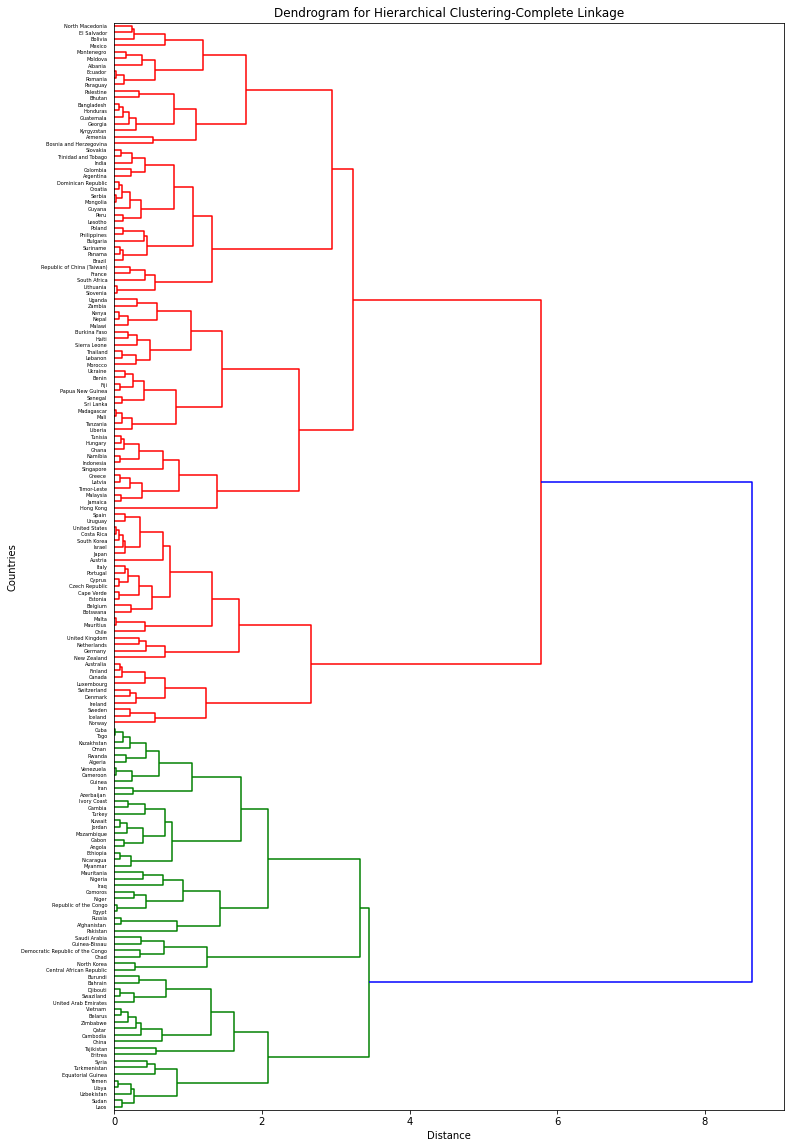

In [191]:
# Generating a dendrogram for linking method 
link = linkage(X_pca, 'complete')

plt.figure(figsize=(12, 20))
dendrogram(link, orientation='right',labels=dem_index['country'].values)
plt.title("Dendrogram for Hierarchical Clustering-Complete Linkage")
plt.xlabel('Distance')
plt.ylabel('Countries')
plt.show()

### **Task 6:** Plot the democracy index values

For aforementioned methods generate the clustering solution. The clustering solution simply groups the countries into different groups   
based on similarity. Once the solution is obtained, plot density plots of democracy index values considering all the countries within a group. 


Using the dataset with the cluster values from the KMeans Clustering algorithm, we create
individual dataframes for each cluster.
And list the countries in each dataframe, ie, each cluster.

In [192]:
#Listing the countries in each cluster.

#temporary dataframe to store the democracy_index, country and clusters value from the KMeans Clustering solution

tdf = dem_index[['democracy_index','clusters','country','category']]
tdf1 = tdf[tdf['clusters'] == 0]
tdf2 = tdf[tdf['clusters'] == 1]
tdf3 = tdf[tdf['clusters'] == 2]
tdf4 = tdf[tdf['clusters'] == 3]

In [202]:
#Listing the Countries from Cluster#1
print(f'Countries in Cluster(1) are :\n')
print(tdf1[['country','democracy_index']])

Countries in Cluster(1) are :

           country  democracy_index
0           Norway             9.87
1          Iceland             9.58
2           Sweden             9.39
3      New Zealand             9.26
4          Denmark             9.22
5          Ireland             9.15
6           Canada             9.15
7          Finland             9.14
8        Australia             9.09
9      Switzerland             9.03
10     Netherlands             8.89
11      Luxembourg             8.81
12         Germany             8.68
13  United Kingdom             8.53
14         Uruguay             8.38
15         Austria             8.29
16       Mauritius             8.22
17           Malta             8.21
18           Spain             8.08
19      Costa Rica             8.07
20     South Korea             8.00
21           Japan             7.99
22           Chile             7.97
23         Estonia             7.97
24   United States             7.96
25      Cape Verde             7.

In [201]:
#Listing the Countries from Cluster#2
print(f'Countries in cluster(2) are:\n')
print(tdf2[['country','democracy_index']])

Countries in cluster(2) are:

                              country  democracy_index
117                           Myanmar             3.83
121                         Nicaragua             3.63
122                            Angola             3.62
123                             Gabon             3.61
124                          Cambodia             3.59
125                           Algeria             3.50
126                             Egypt             3.36
127                          Ethiopia             3.35
128                            Rwanda             3.35
129                             China             3.32
130             Republic of the Congo             3.31
131                          Cameroon             3.28
132                             Qatar             3.19
133                          Zimbabwe             3.16
134                         Venezuela             3.16
135                            Guinea             3.14
136                           Belar

In [200]:
#Listing the Countries from Cluster#3
print(f'Countries in cluster(3) are:\n')
print(tdf3[['country','democracy_index']])

Countries in cluster(3) are:

                    country  democracy_index
81                    Benin             5.74
83                  Ukraine             5.69
84                 Honduras             5.63
85                   Zambia             5.61
86                Guatemala             5.60
87               Bangladesh             5.57
88                  Georgia             5.50
89                   Malawi             5.49
90                 Tanzania             5.41
91                     Mali             5.41
92                  Liberia             5.35
93                   Bhutan             5.30
94               Madagascar             5.22
95                   Uganda             5.20
96                    Nepal             5.18
97                    Kenya             5.11
98               Kyrgyzstan             5.11
99                  Morocco             4.99
100  Bosnia and Herzegovina             4.98
101                   Haiti             4.91
102                 Armen

In [196]:
#Listing the Countries from Cluster#4
print(f'Countries in cluster(4) are:\n')
print(tdf4[['country','democracy_index']])

Countries in cluster(4) are:

                       country  democracy_index
28                      France             7.80
31  Republic of China (Taiwan)             7.73
35                    Slovenia             7.50
36                   Lithuania             7.50
37                      Latvia             7.38
38                      Greece             7.29
39                South Africa             7.24
40                       India             7.23
41                 Timor-Leste             7.19
42         Trinidad and Tobago             7.16
43                    Slovakia             7.10
44                      Panama             7.05
45                    Bulgaria             7.03
46                   Argentina             7.02
47                     Jamaica             7.02
48                    Suriname             6.98
49                      Brazil             6.97
50                    Colombia             6.96
51                    Malaysia             6.88
52        

We finally use the kdeplot function of seaborn to visualize the density plots to show the
distribution of each cluster using ‘layer’ in multiple criterion for layering them.

<Figure size 720x504 with 0 Axes>

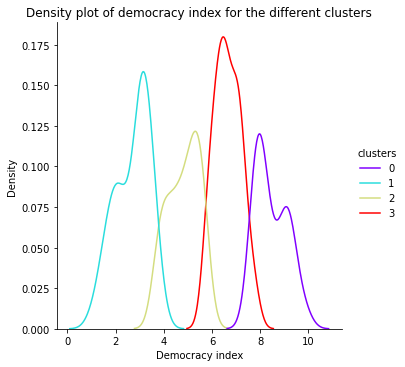

In [205]:
#Plotting Density plot with layers of the four clusters
plt.figure(figsize=(10, 7))
#sns.kdeplot(data=tdf, x="democracy_index", hue="clusters", multiple="layer", palette = 'rainbow')
sns.displot(data=tdf, x="democracy_index", hue="clusters", multiple="layer", palette = 'rainbow', kind='kde')
plt.title("Density plot of democracy index for the different clusters")
plt.xlabel("Democracy index")
plt.show()

### **Analysis:**

Looking at the density plots and the data slicing, each cluster is almost a normal
distribution.

### Challenges faced:

1. Got the opportunity to learn about PCA for converting the five features to 2d for
visualization.
2. Forgot to transform the centroids so, it was not inside the clusters.
3. Dendrogram is still not showing four clusters(not in four different colors).
4. Wanted to explore if the country name can be displayed in the kdeplot, but couldn’t
because of the lack of time.
5. I believed the clusters would have the countries from the same regime, but some
are not clustered together.

## Submission Guidelines

- All codes should be well-commented to explain your thought process and implementation details. 
- Include all visualizations in your final report. 
- Your report should detail the steps you took, any challenges faced, and the insights or conclusions you drew from the visualizations  

### Evaluation Criteria:
 
**Tasks to be Completed and their point values:**
- Variable selection and scaling (10 points)
- K-means clustering implementation (40 points)
- Hierarchical clustering implementation (40 points)
- Density Plots (10 points)

## Submitting your Project

Once you've completed your project, it's time to submit your work for grading.   
This week, you will submit your code file `Project 1.ipynb` to the following Staff Graded Assignment for review.  

In order to submit your work, please follow the steps below:
1. Verify you've saved your work using the `Save` button within the Jupyter Notebook 
2. Download this notebook using the `File` -> `Download As` -> Choose the `Notebook (.ipynb)` format.
3. Access the following Step 2: Submit Project 1 item.
4. Complete all prompted fields, and upload your Jupyter Notebook file (Project 1.ipynb) in the indicated field.
5. Submit your notebook to "Step 2: Submit Project 1" by the deadline indicated within your course view for the Project 3 Assignment item.

Congratulations on completing the Project 1 Assignment!